In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
import os.path
import IPython.display
import seaborn as sns
import librosa
import librosa.display
import soundfile

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

import warnings

In [2]:
Audio = 'Speech Recognition'

In [3]:
Crema = Audio + "/Crema/" 

In [4]:
Crema_list = os.listdir(Crema)

In [5]:
Ex_Crema_list = Crema_list[:15]
Ex_Crema_list

['1001_IOM_SAD_XX.wav',
 '1001_ITH_ANG_XX.wav',
 '1001_ITH_DIS_XX.wav',
 '1001_ITH_FEA_XX.wav',
 '1001_ITH_HAP_XX.wav',
 '1001_ITH_NEU_XX.wav',
 '1001_ITH_SAD_XX.wav',
 '1001_ITS_ANG_XX.wav',
 '1001_ITS_DIS_XX.wav',
 '1001_ITS_FEA_XX.wav',
 '1001_ITS_HAP_XX.wav',
 '1001_ITS_NEU_XX.wav',
 '1001_ITS_SAD_XX.wav',
 '1001_IWL_ANG_XX.wav',
 '1001_IWL_DIS_XX.wav']

In [6]:
emotions_crema = []
paths_crema = []

for it in Crema_list:
    # storing file paths
    paths_crema.append(Crema + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')
        
# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
Crema_df.head().style.set_properties()

(7415, 2)


,Emotions,Path
0,sad,Speech Recognition/Crema/1001_IOM_SAD_XX.wav
1,angry,Speech Recognition/Crema/1001_ITH_ANG_XX.wav
2,disgust,Speech Recognition/Crema/1001_ITH_DIS_XX.wav
3,fear,Speech Recognition/Crema/1001_ITH_FEA_XX.wav
4,happy,Speech Recognition/Crema/1001_ITH_HAP_XX.wav


In [7]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

[['sad', 'angry', 'disgust', 'fear', 'happy', 'neutral'],
 ['sad', 'angry', 'disgust', 'fear', 'happy', 'neutral']]

C:\Users\Hanlala\AppData\Local\Temp\ipykernel_5792\2347466600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")


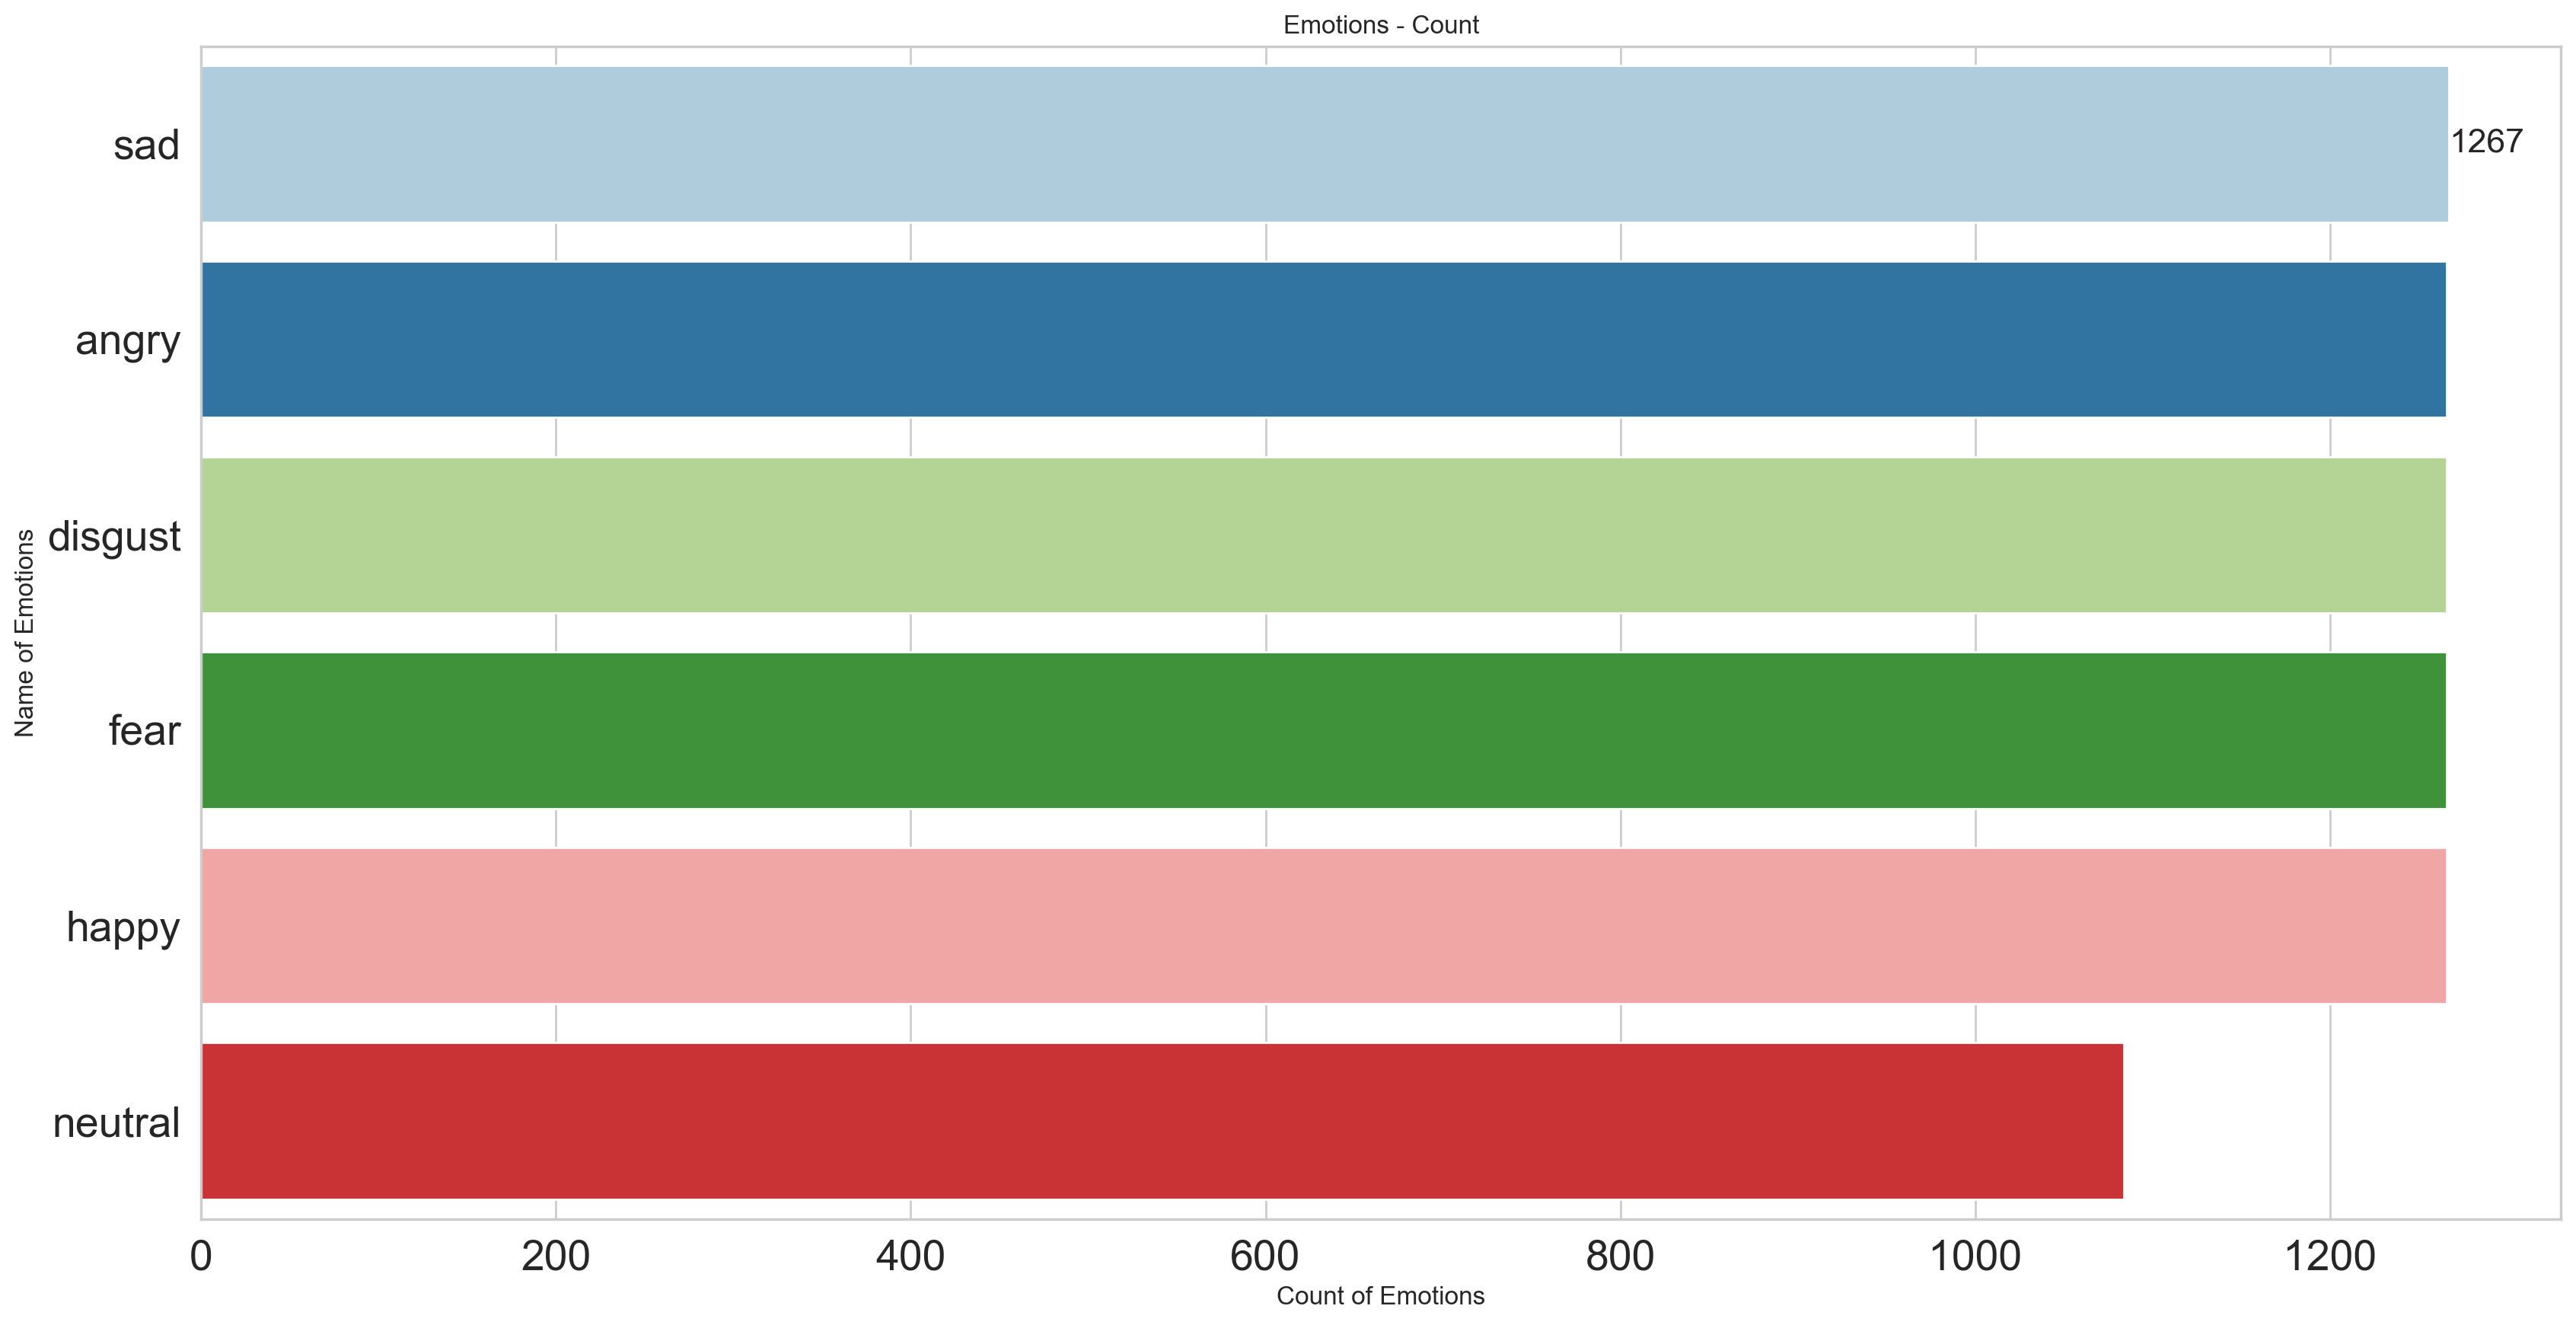

In [8]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

C:\Users\Hanlala\AppData\Local\Temp\ipykernel_5792\2347466600.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")


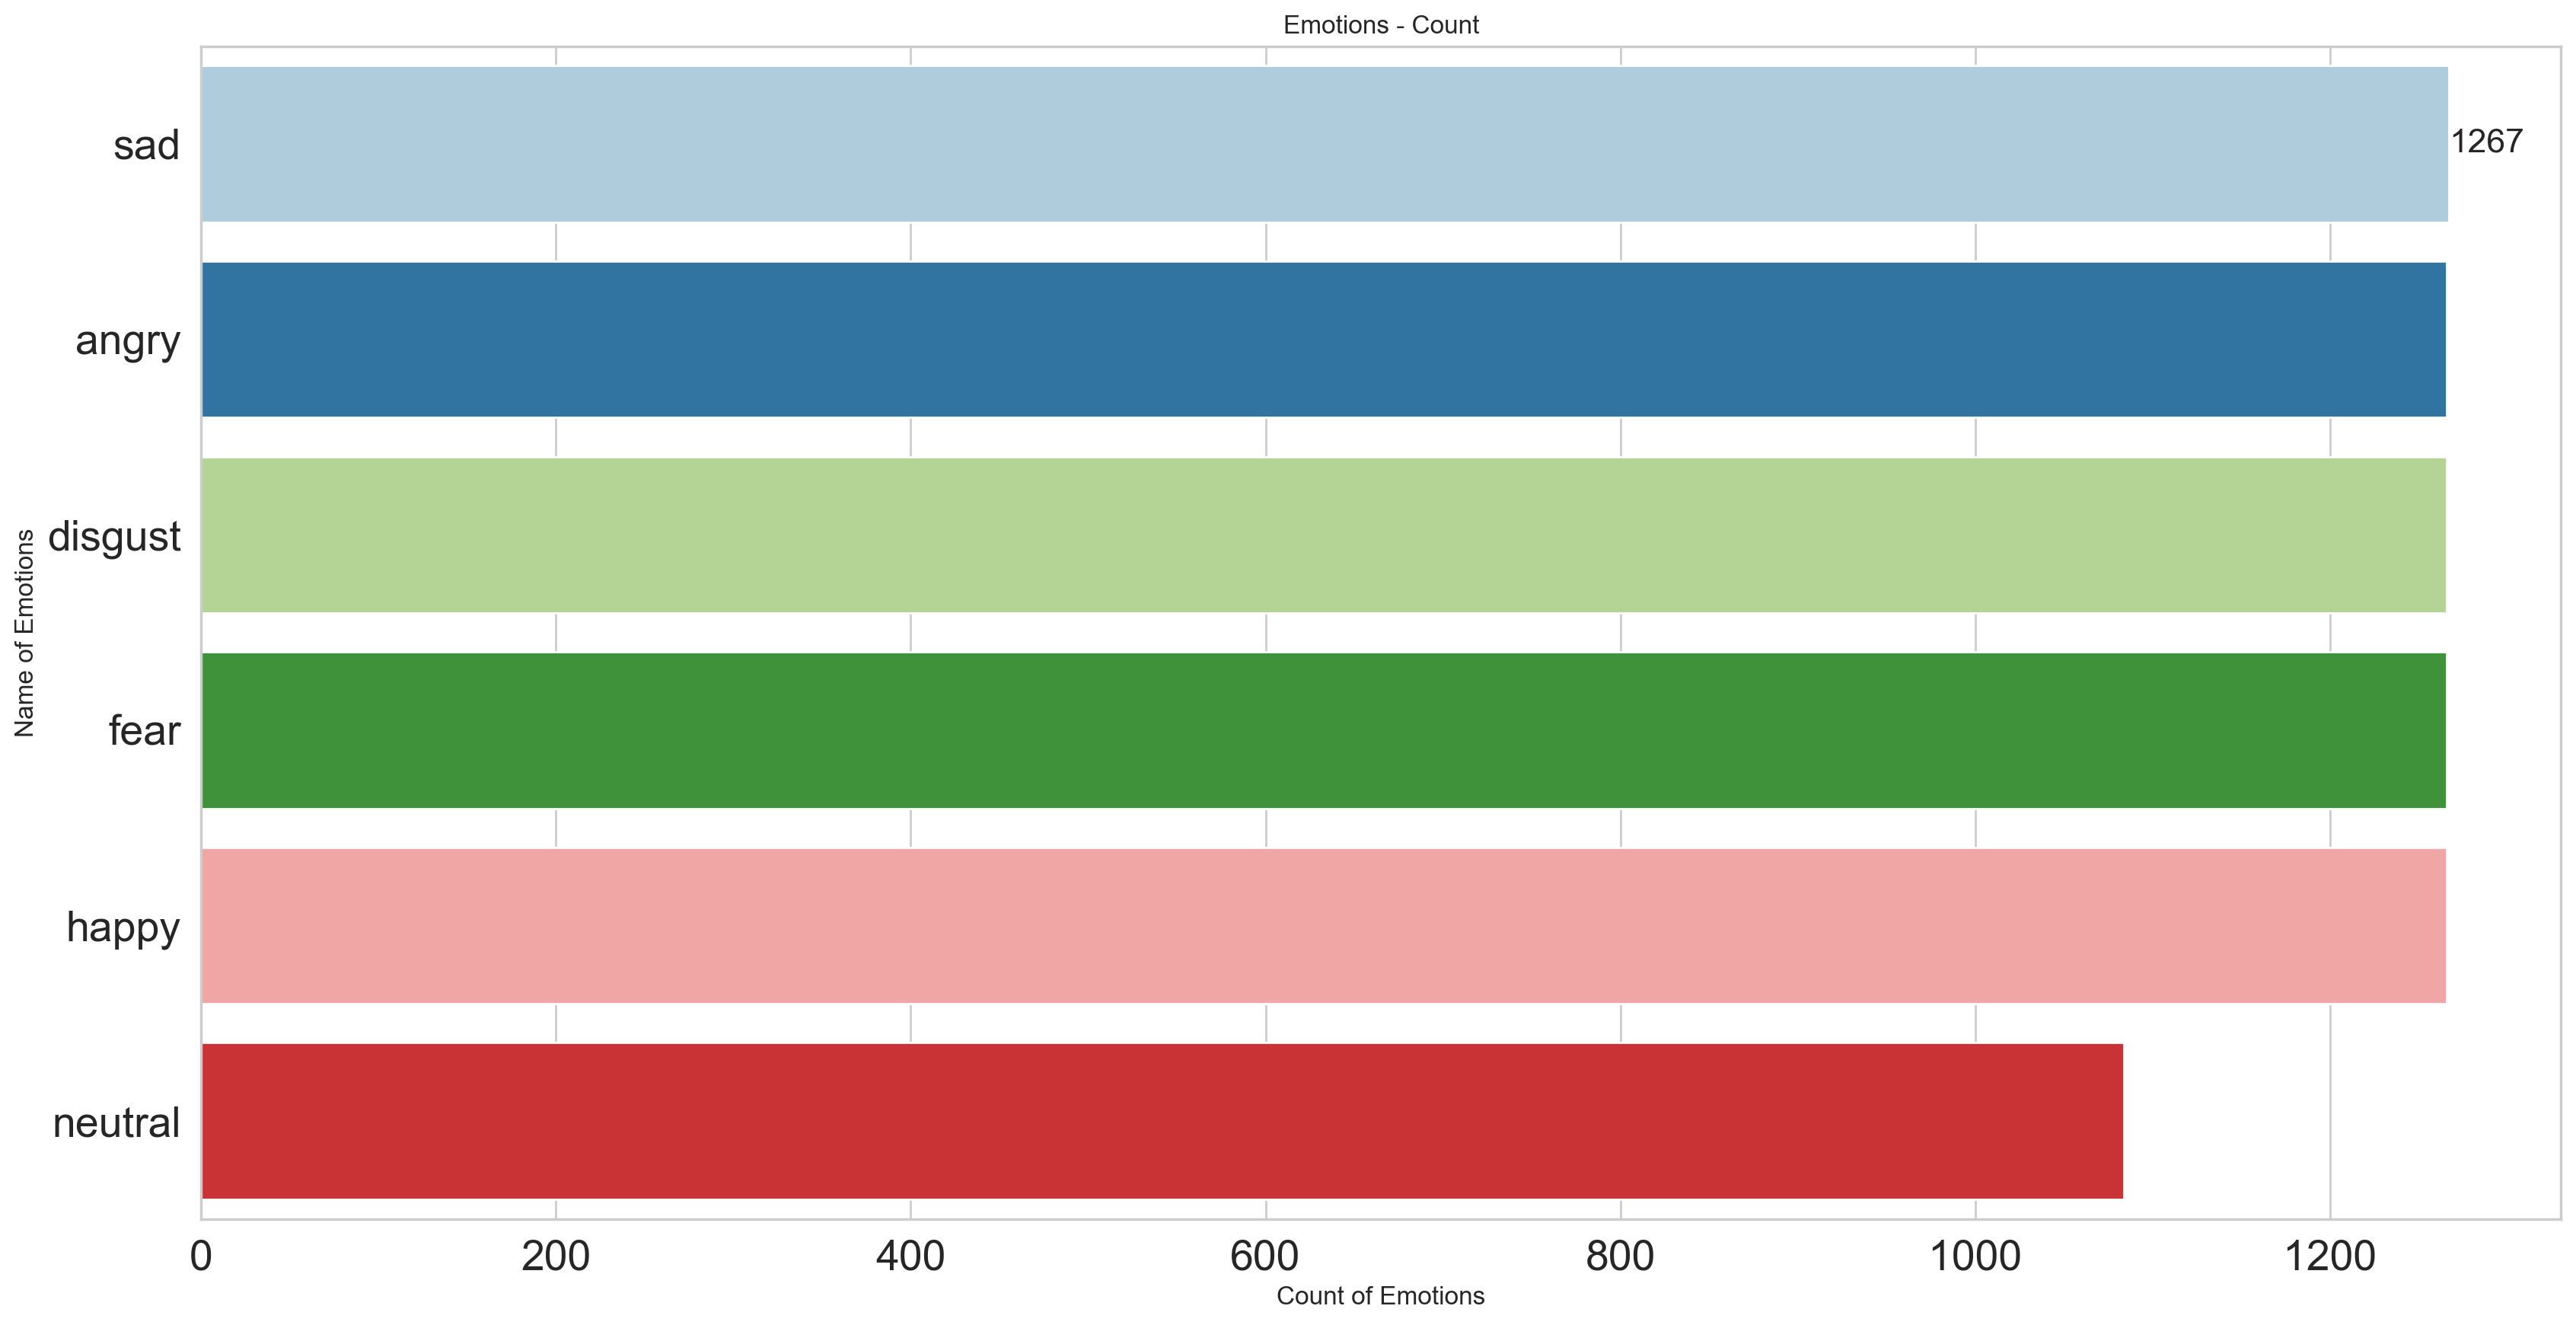

In [9]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [10]:
Sum_df = pd.concat([Crema_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head()

,Emotions,Path
0,sad,Speech Recognition/Crema/1001_IOM_SAD_XX.wav
1,angry,Speech Recognition/Crema/1001_ITH_ANG_XX.wav
2,disgust,Speech Recognition/Crema/1001_ITH_DIS_XX.wav
3,fear,Speech Recognition/Crema/1001_ITH_FEA_XX.wav
4,happy,Speech Recognition/Crema/1001_ITH_HAP_XX.wav


In [11]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['sad', 'angry', 'disgust', 'fear', 'happy', 'neutral'],
 ['sad', 'angry', 'disgust', 'fear', 'happy', 'neutral']]

C:\Users\Hanlala\AppData\Local\Temp\ipykernel_5792\571858883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")


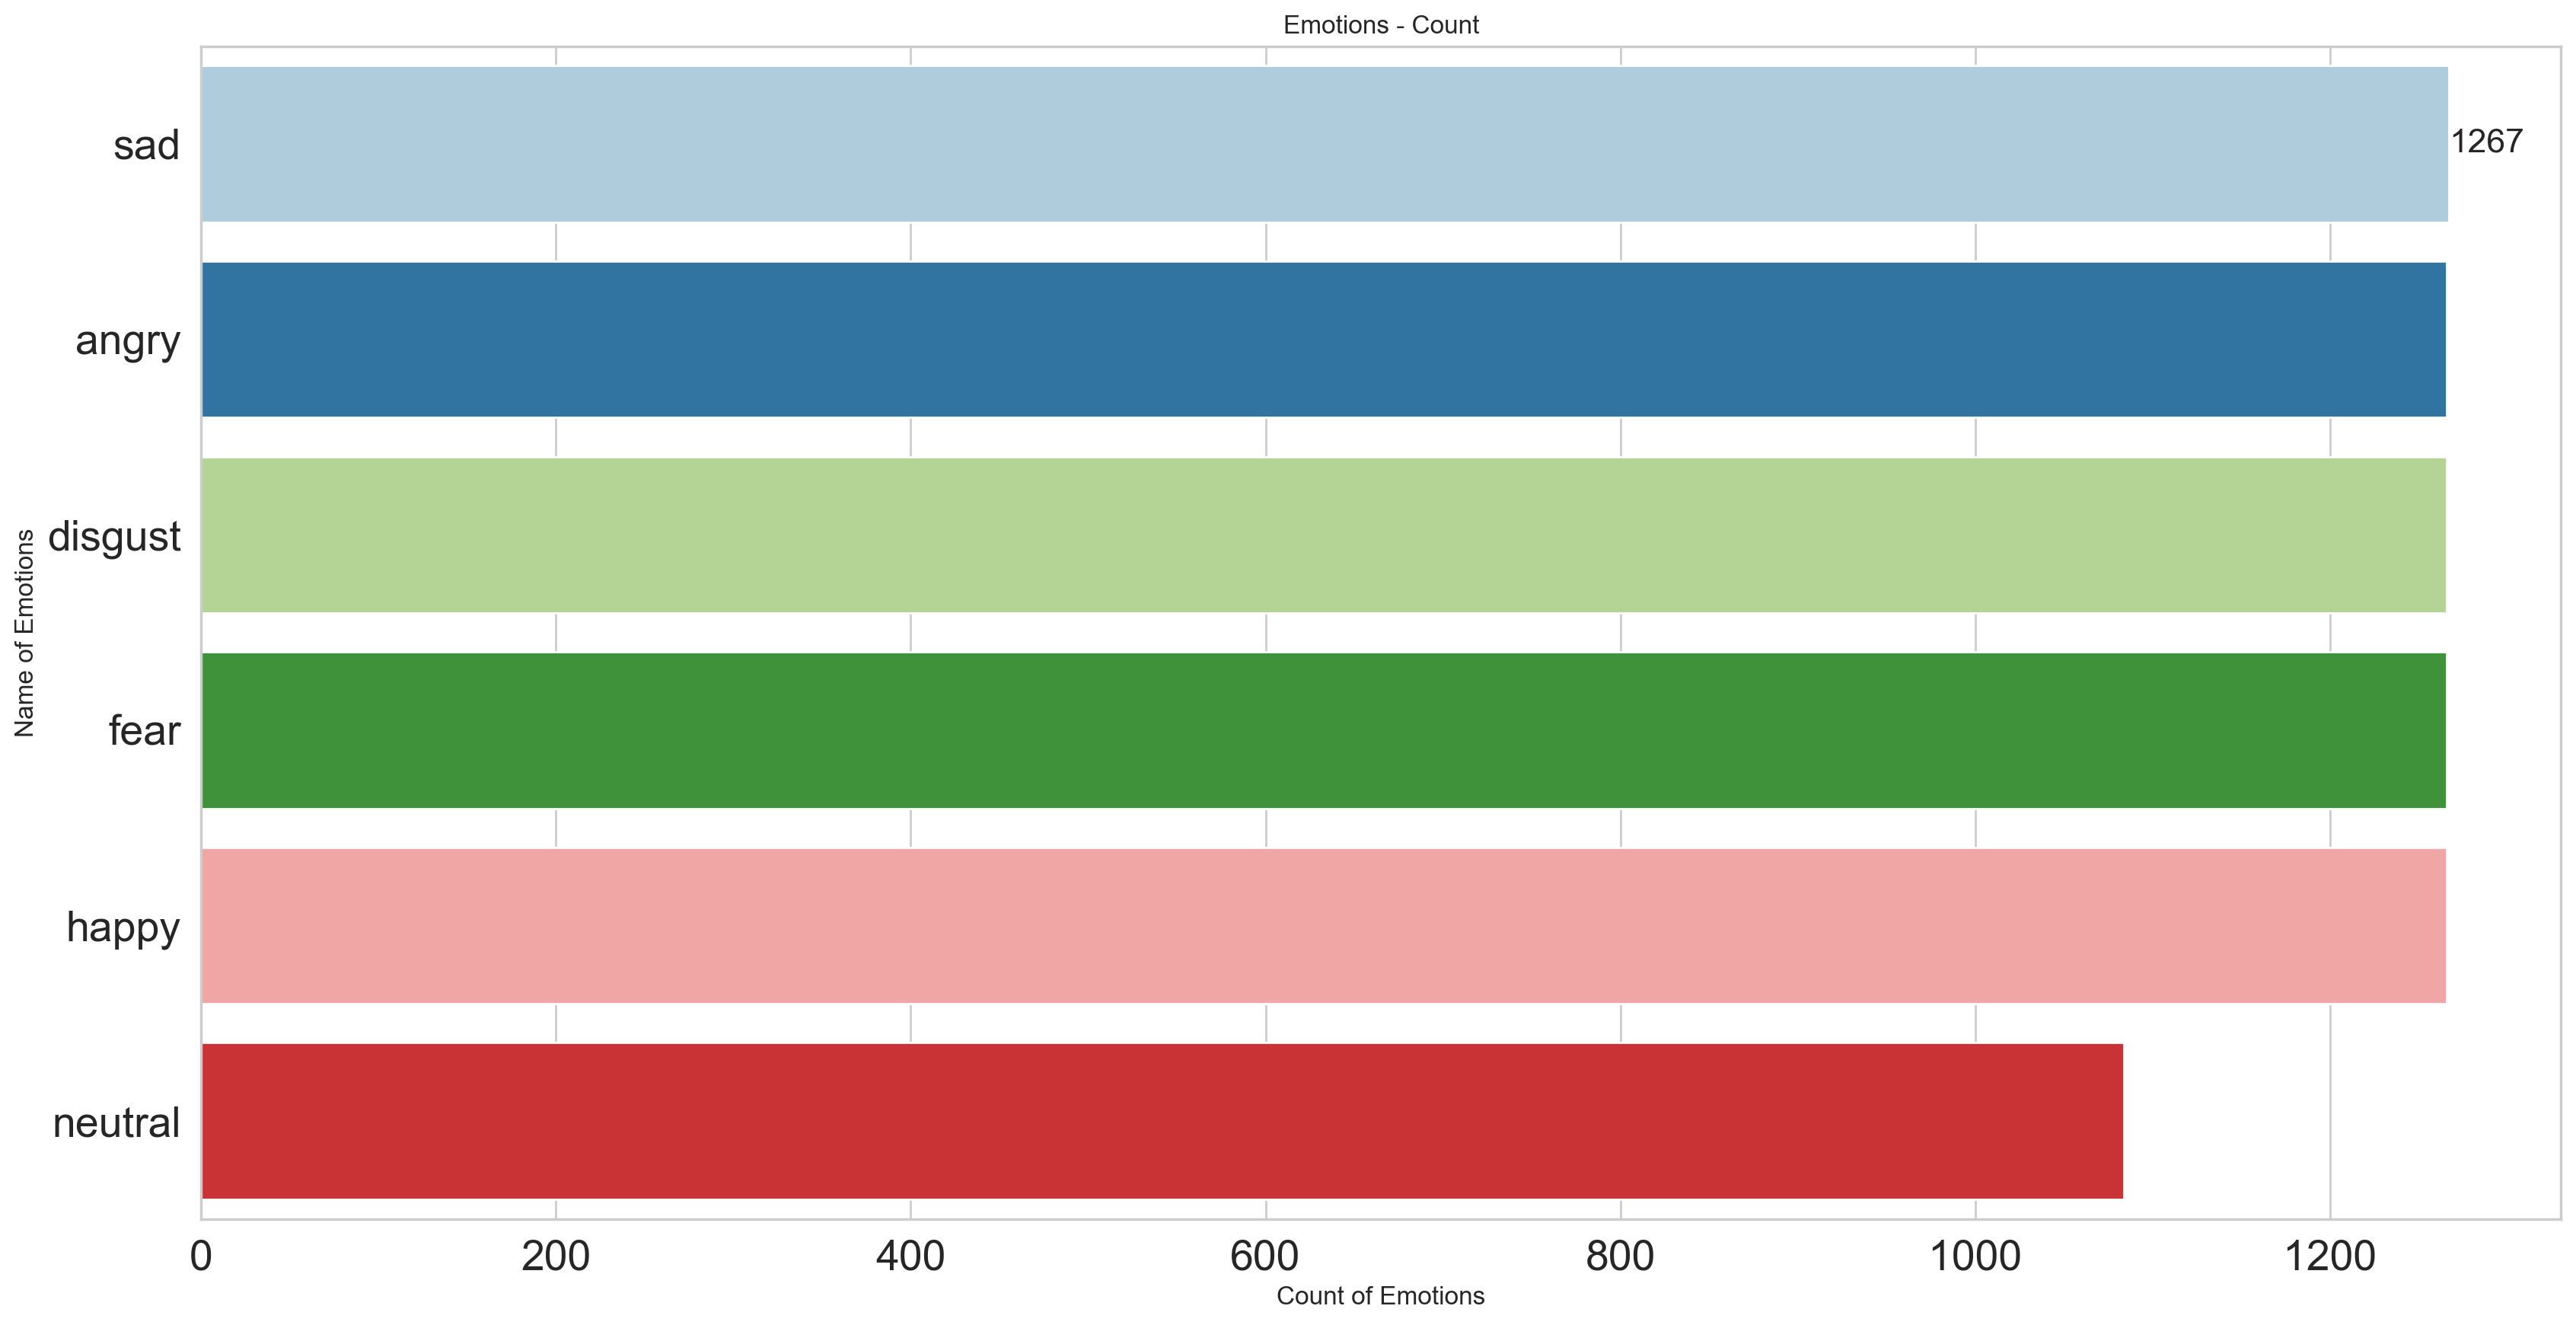

In [12]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [13]:
Sum_df_rep = Sum_df
Sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
Sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
Sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [14]:
[Sum_df_rep["Emotions"].unique().tolist() for i in Sum_df_rep.columns]

[['sad', 'angry', 'disgust', 'fear', 'happy', 'neutral'],
 ['sad', 'angry', 'disgust', 'fear', 'happy', 'neutral']]

C:\Users\Hanlala\AppData\Local\Temp\ipykernel_5792\4291883407.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")


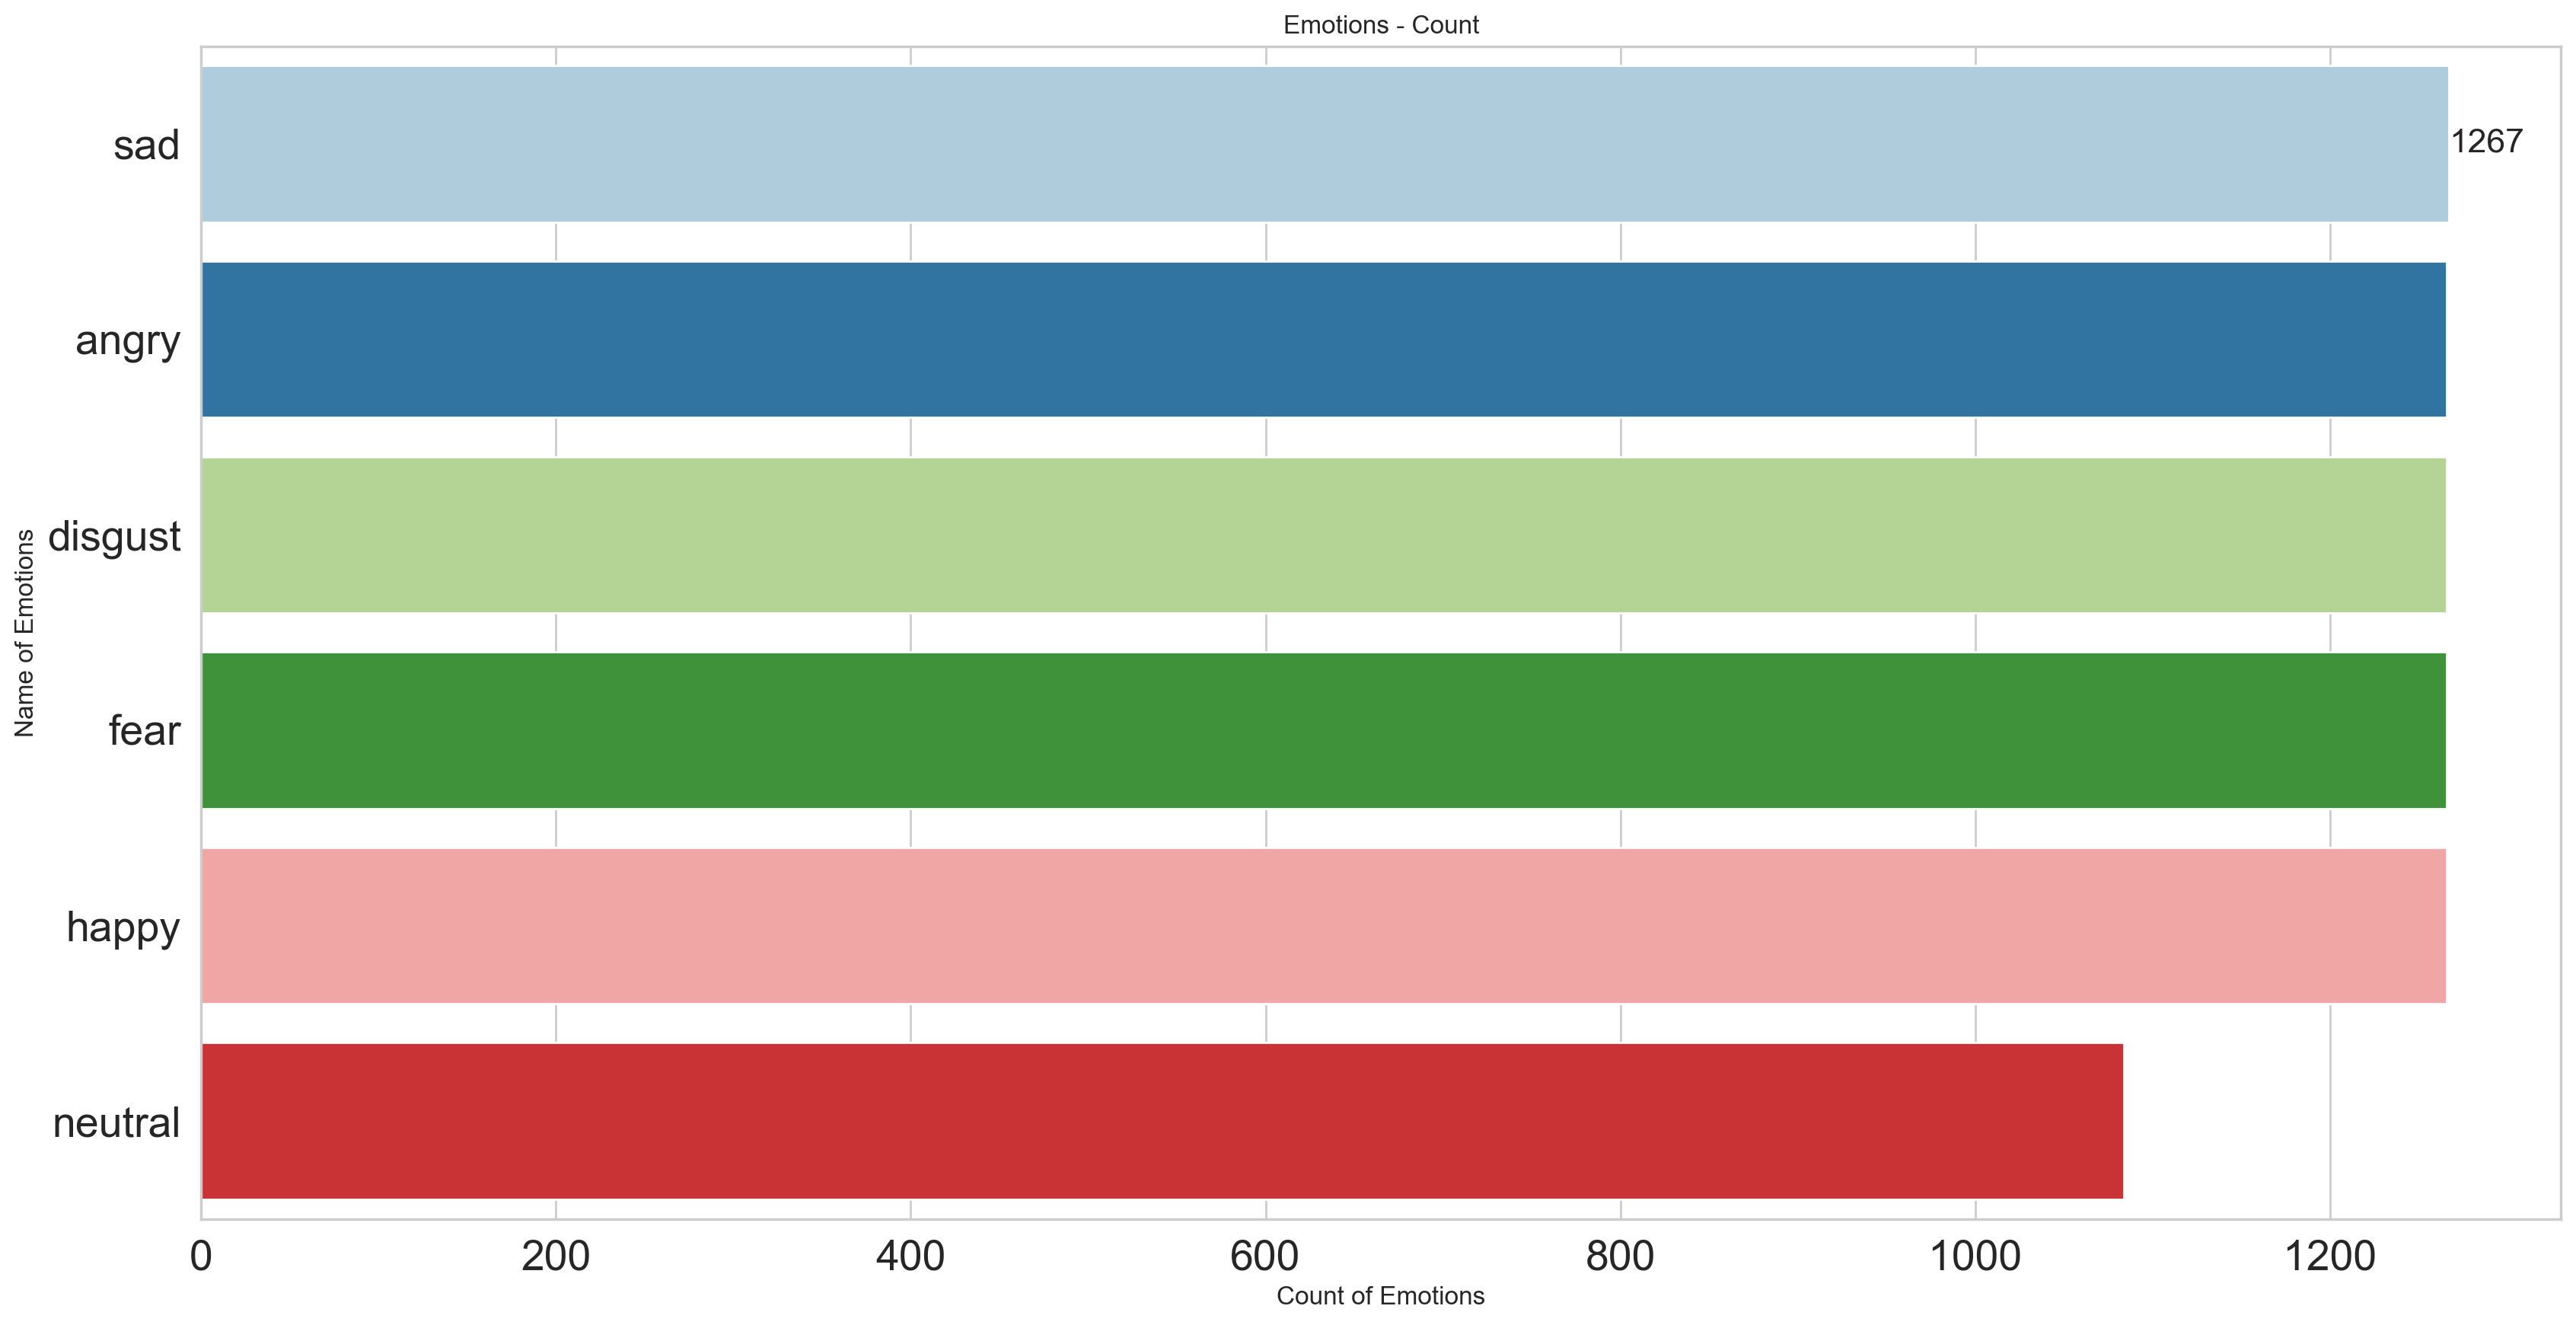

In [15]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="Paired")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [16]:
%%time
audio_arrays = []

for i in Sum_df_rep['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)
    
Sum_df_rep['Arrays'] = audio_arrays


CPU times: total: 27.2 s
Wall time: 29.4 s


In [17]:
Sum_df_rep.head()

,Emotions,Path,Arrays
0,sad,Speech Recognition/Crema/1001_IOM_SAD_XX.wav,"[-0.004410249, -0.005343005, -0.0046328343, -0..."
1,angry,Speech Recognition/Crema/1001_ITH_ANG_XX.wav,"[0.005596013, 0.007043511, 0.0063932696, 0.005..."
2,disgust,Speech Recognition/Crema/1001_ITH_DIS_XX.wav,"[0.030269146, 0.03834998, 0.03519141, 0.032532..."
3,fear,Speech Recognition/Crema/1001_ITH_FEA_XX.wav,"[0.004134277, 0.005246445, 0.0047892393, 0.004..."
4,happy,Speech Recognition/Crema/1001_ITH_HAP_XX.wav,"[-0.003066195, -0.003877704, -0.0035170487, -0..."


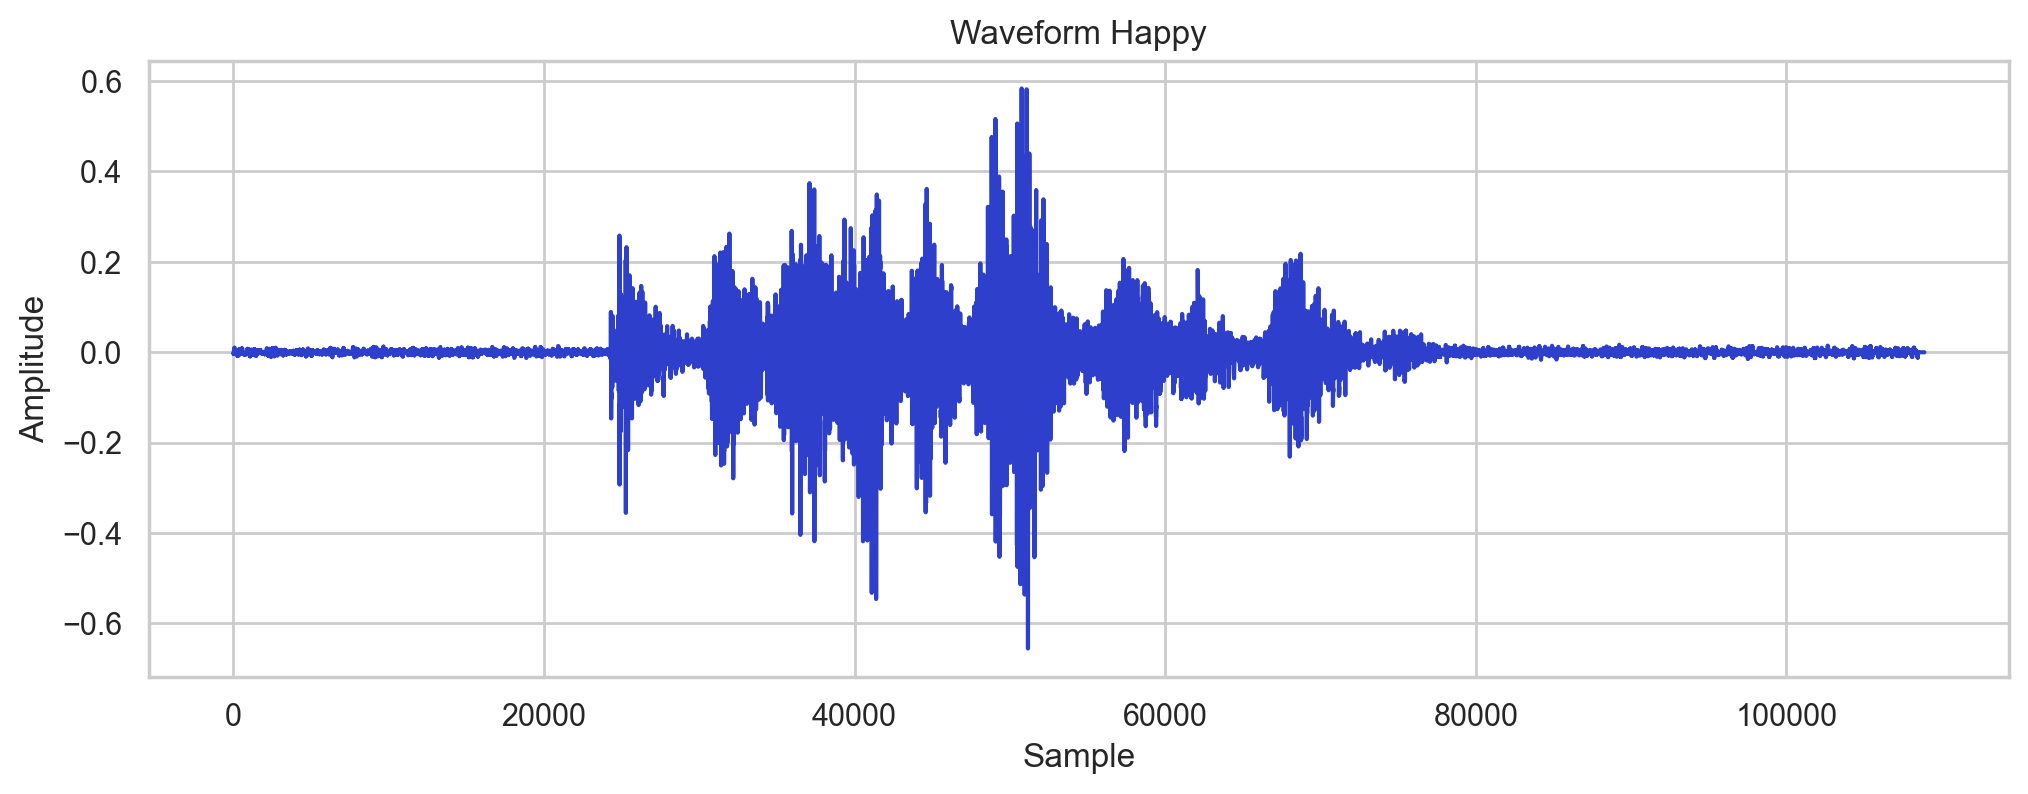

In [18]:
happy_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Happy')
plt.show()

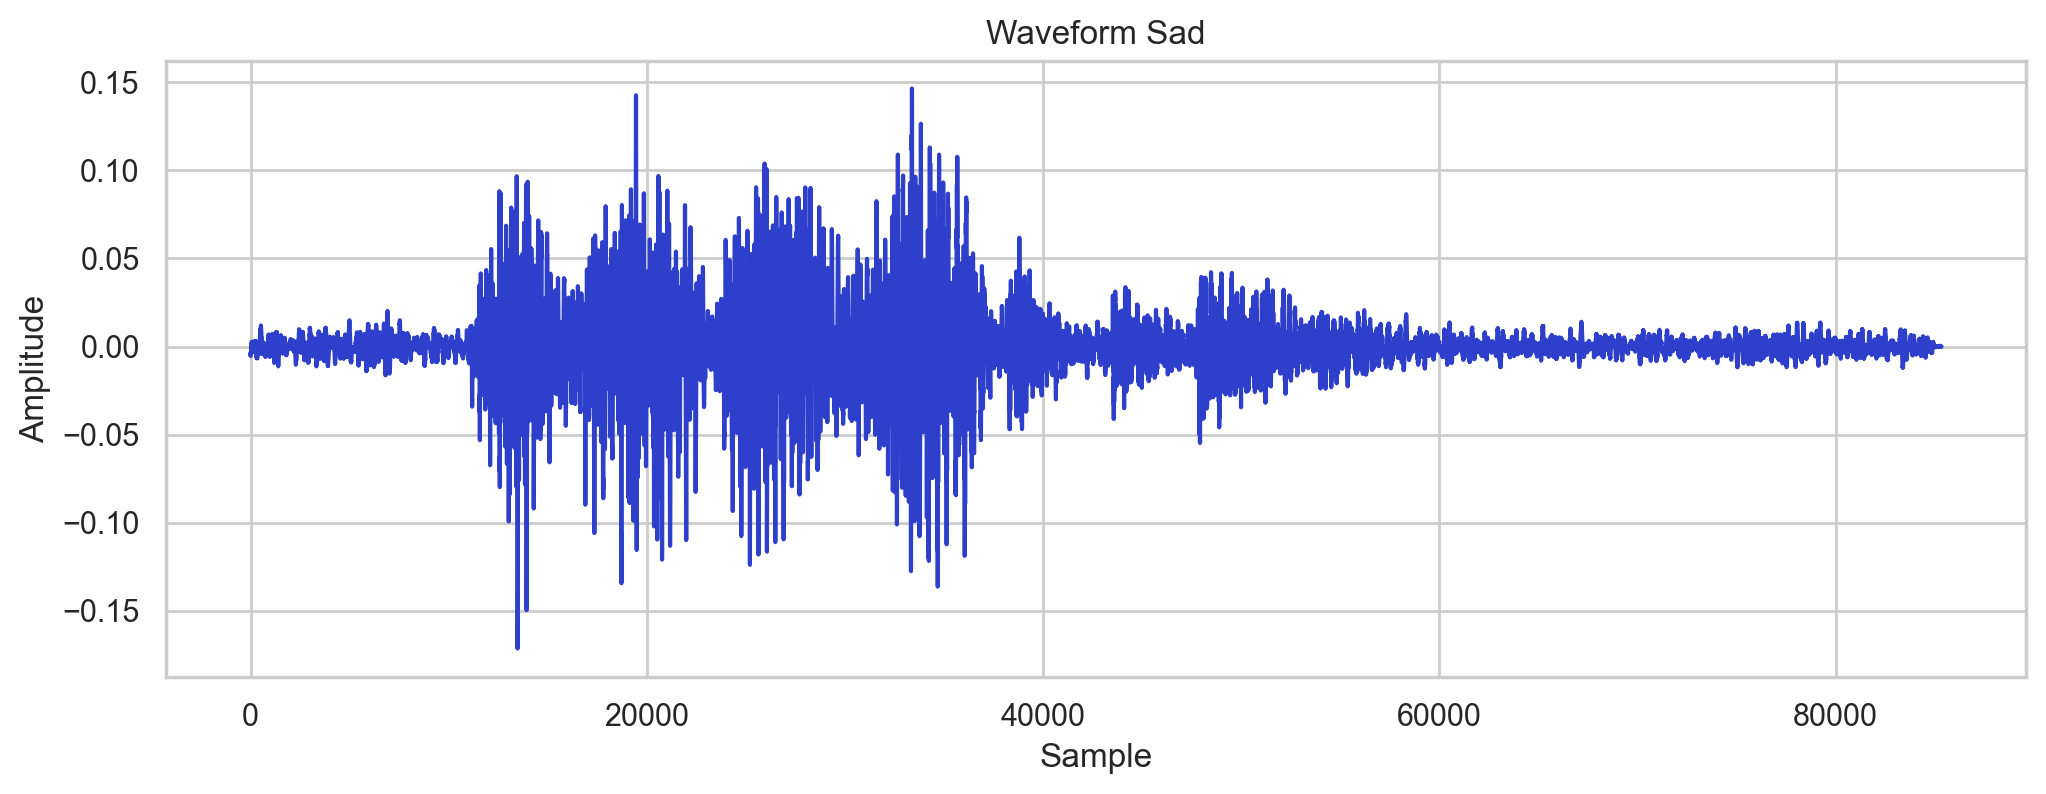

In [19]:
sad_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Sad')
plt.show()

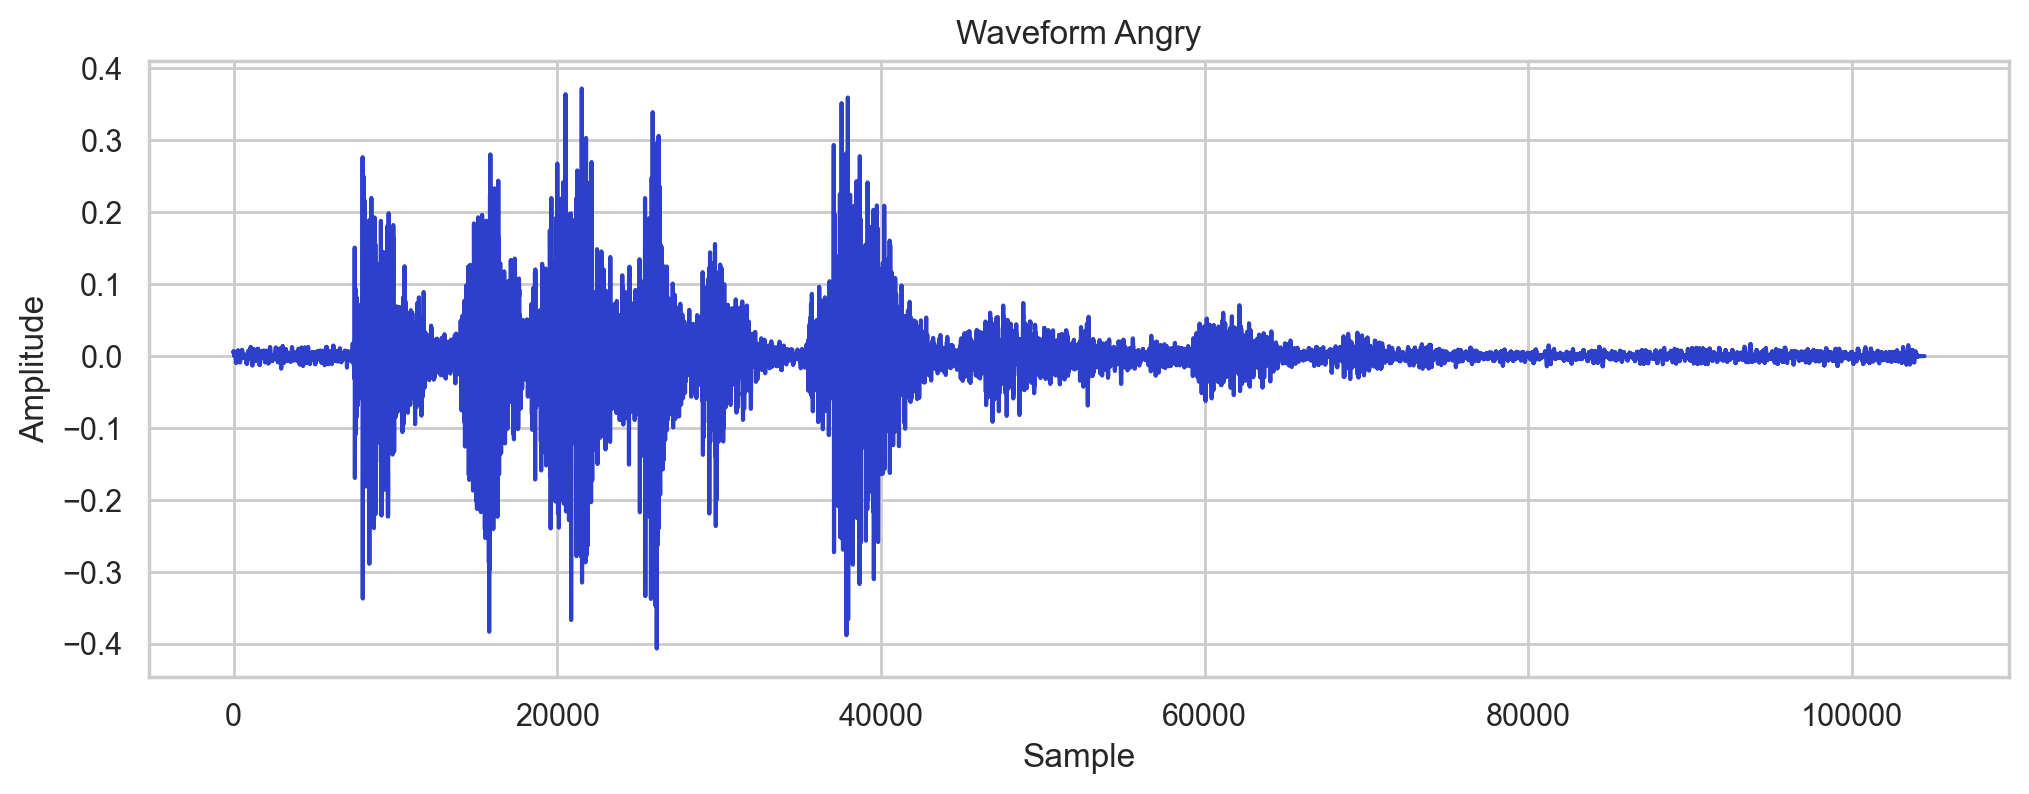

In [20]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Angry')
plt.show()

In [21]:
Crema_df

,Emotions,Path
0,sad,Speech Recognition/Crema/1001_IOM_SAD_XX.wav
1,angry,Speech Recognition/Crema/1001_ITH_ANG_XX.wav
2,disgust,Speech Recognition/Crema/1001_ITH_DIS_XX.wav
3,fear,Speech Recognition/Crema/1001_ITH_FEA_XX.wav
4,happy,Speech Recognition/Crema/1001_ITH_HAP_XX.wav
...,...,...
7410,disgust,Speech Recognition/Crema/1091_WSI_DIS_XX.wav
7411,fear,Speech Recognition/Crema/1091_WSI_FEA_XX.wav
7412,happy,Speech Recognition/Crema/1091_WSI_HAP_XX.wav
7413,neutral,Speech Recognition/Crema/1091_WSI_NEU_XX.wav


In [22]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [23]:
extract_mfcc(Crema_df['Path'][0])

array([-3.96784882e+02,  1.39046844e+02, -1.14843531e+01,  5.44002838e+01,
        7.97512412e-01,  1.80394459e+01, -1.93271847e+01,  1.11060505e+01,
       -1.13426523e+01, -9.41310692e+00, -1.13837404e+01, -4.20730740e-01,
       -2.90621340e-01, -1.53993883e+01,  5.21758032e+00, -1.51195717e+01,
        1.12881863e+00, -6.77947474e+00, -2.49571800e+00, -4.02306461e+00,
       -7.92982149e+00, -3.74247098e+00, -4.45618534e+00, -2.29213095e+00,
       -6.89447498e+00,  2.67180729e+00, -6.14607620e+00,  2.03372538e-01,
       -3.17907691e+00, -1.43629050e+00, -1.29198956e+00, -3.51665330e+00,
       -1.86027035e-01, -1.04140460e+00,  6.42033741e-02, -6.65574837e+00,
       -1.07527566e+00, -5.12853432e+00, -6.88687980e-01, -1.58566201e+00],
      dtype=float32)

In [24]:
X_mfcc = Crema_df['Path'].apply(lambda x: extract_mfcc(x))

In [25]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7415, 40)

In [26]:
X = np.expand_dims(X, -1)
X.shape

(7415, 40, 1)

In [27]:
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [28]:
y = y.toarray()

In [29]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 3

In [30]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=10, batch_size=64)

Epoch 1/10
93/93 [==============================] - 66s 679ms/step - loss: 1.7155 - accuracy: 0.2384 - val_loss: 1.7104 - val_accuracy: 0.2421
Epoch 2/10
93/93 [==============================] - 52s 555ms/step - loss: 1.5964 - accuracy: 0.3184 - val_loss: 1.6334 - val_accuracy: 0.2913
Epoch 3/10
93/93 [==============================] - 51s 549ms/step - loss: 1.5578 - accuracy: 0.3484 - val_loss: 1.5799 - val_accuracy: 0.3297
Epoch 4/10
93/93 [==============================] - 51s 549ms/step - loss: 1.5199 - accuracy: 0.3685 - val_loss: 1.5841 - val_accuracy: 0.3351
Epoch 5/10
93/93 [==============================] - 52s 559ms/step - loss: 1.5145 - accuracy: 0.3675 - val_loss: 1.5378 - val_accuracy: 0.3506
Epoch 6/10
93/93 [==============================] - 52s 559ms/step - loss: 1.4954 - accuracy: 0.3785 - val_loss: 1.5760 - val_accuracy: 0.3439
Epoch 7/10
93/93 [==============================] - 51s 549ms/step - loss: 1.4760 - accuracy: 0.3845 - val_loss: 1.6080 - val_accuracy: 0.3425